In [0]:

#!pip install pytorch-gradcam

In [0]:
import torchvision
import torch
import torch.optim as optim
import torch.nn as nn
import torchvision.transforms as transforms

In [0]:

import Model as Md
import Misclassified_image as MC
from TrainTestandUtils import TrainTestandUtils as Tt

In [0]:
#!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

In [0]:

from Albumentations import album_compose
from GradCAM import GradCAM
from Utils import *

In [0]:
a =album_compose()

In [7]:
from lr_finder import LRFinder

  pip install torch-lr-finder -v --global-option="amp"


In [8]:
transform = transforms.Compose(
    [ transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=a)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print (device)

cuda


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()



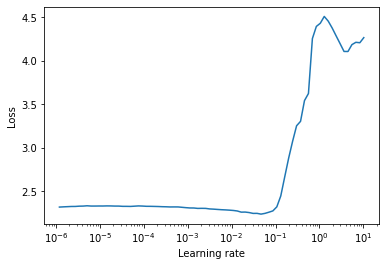

In [10]:

model = Md.ResNet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-7, momentum=0.9,weight_decay=0.0004)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=100, num_iter=100)
lr_finder.plot()

In [0]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [0]:
#Found optimum LR through plot

model = Md.ResNet18().to(device)
#criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.07, momentum=0.95)#,weight_decay=0.0004)
scheduler = ReduceLROnPlateau(optimizer, 'min')
#scheduler = optim.lr_scheduler.OneCycleLR(optimizer,max_lr=0.1,total_steps=20)

new_model = Tt(model=model,
               device=device,
               optimizer=optimizer,
               criterion=criterion,
               scheduler=scheduler,
               trainloader=trainloader,
               testloader=testloader,
               epochs=50,
               input_size=(3,32,32),
               classes=classes)

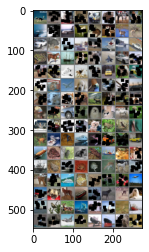

In [13]:
new_model.plot_train_images()

In [14]:
new_model.disp_summary()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [15]:
new_model.runModel()

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH  1


Loss=1.572849988937378 Batch_id=390 Accuracy=28.99: 100%|██████████| 391/391 [00:30<00:00, 13.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0133, Accuracy: 3785/10000 (37.85%)

EPOCH  2


Loss=1.4852097034454346 Batch_id=390 Accuracy=41.04: 100%|██████████| 391/391 [00:30<00:00, 13.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0118, Accuracy: 4544/10000 (45.44%)

EPOCH  3


Loss=1.3189733028411865 Batch_id=390 Accuracy=48.56: 100%|██████████| 391/391 [00:30<00:00, 12.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0097, Accuracy: 5494/10000 (54.94%)

EPOCH  4


Loss=1.19693124294281 Batch_id=390 Accuracy=54.85: 100%|██████████| 391/391 [00:29<00:00, 13.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0085, Accuracy: 6129/10000 (61.29%)

EPOCH  5


Loss=0.9737354516983032 Batch_id=390 Accuracy=60.50: 100%|██████████| 391/391 [00:30<00:00, 12.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0077, Accuracy: 6567/10000 (65.67%)

EPOCH  6


Loss=0.863494873046875 Batch_id=390 Accuracy=64.36: 100%|██████████| 391/391 [00:29<00:00, 13.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0069, Accuracy: 6892/10000 (68.92%)

EPOCH  7


Loss=0.9246174097061157 Batch_id=390 Accuracy=67.79: 100%|██████████| 391/391 [00:29<00:00, 13.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0061, Accuracy: 7283/10000 (72.83%)

EPOCH  8


Loss=0.8452111482620239 Batch_id=390 Accuracy=71.27: 100%|██████████| 391/391 [00:29<00:00, 13.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0059, Accuracy: 7409/10000 (74.09%)

EPOCH  9


Loss=0.6420984864234924 Batch_id=390 Accuracy=73.42: 100%|██████████| 391/391 [00:30<00:00, 12.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0056, Accuracy: 7564/10000 (75.64%)

EPOCH  10


Loss=0.7042093873023987 Batch_id=390 Accuracy=75.63: 100%|██████████| 391/391 [00:30<00:00, 13.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0049, Accuracy: 7870/10000 (78.70%)

EPOCH  11


Loss=0.49544239044189453 Batch_id=390 Accuracy=77.99: 100%|██████████| 391/391 [00:29<00:00, 13.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0047, Accuracy: 7979/10000 (79.79%)

EPOCH  12


Loss=0.6240788698196411 Batch_id=390 Accuracy=79.44: 100%|██████████| 391/391 [00:30<00:00, 13.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0048, Accuracy: 7957/10000 (79.57%)

EPOCH  13


Loss=0.7683124542236328 Batch_id=390 Accuracy=80.74: 100%|██████████| 391/391 [00:30<00:00, 13.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8246/10000 (82.46%)

EPOCH  14


Loss=0.4897562861442566 Batch_id=390 Accuracy=82.19: 100%|██████████| 391/391 [00:30<00:00, 13.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0043, Accuracy: 8177/10000 (81.77%)

EPOCH  15


Loss=0.5075919032096863 Batch_id=390 Accuracy=82.91: 100%|██████████| 391/391 [00:29<00:00, 13.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0043, Accuracy: 8232/10000 (82.32%)

EPOCH  16


Loss=0.4850614666938782 Batch_id=390 Accuracy=84.58: 100%|██████████| 391/391 [00:30<00:00, 13.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0039, Accuracy: 8395/10000 (83.95%)

EPOCH  17


Loss=0.43855181336402893 Batch_id=390 Accuracy=85.63: 100%|██████████| 391/391 [00:30<00:00, 13.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0039, Accuracy: 8421/10000 (84.21%)

EPOCH  18


Loss=0.3473481833934784 Batch_id=390 Accuracy=86.23: 100%|██████████| 391/391 [00:30<00:00, 12.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0037, Accuracy: 8523/10000 (85.23%)

EPOCH  19


Loss=0.39422157406806946 Batch_id=390 Accuracy=87.07: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8509/10000 (85.09%)

EPOCH  20


Loss=0.34440046548843384 Batch_id=390 Accuracy=87.84: 100%|██████████| 391/391 [00:29<00:00, 13.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8493/10000 (84.93%)

EPOCH  21


Loss=0.4416603147983551 Batch_id=390 Accuracy=88.53: 100%|██████████| 391/391 [00:30<00:00, 13.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0037, Accuracy: 8551/10000 (85.51%)

EPOCH  22


Loss=0.3500491678714752 Batch_id=390 Accuracy=89.30: 100%|██████████| 391/391 [00:30<00:00, 12.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0037, Accuracy: 8527/10000 (85.27%)

EPOCH  23


Loss=0.49369779229164124 Batch_id=390 Accuracy=89.75: 100%|██████████| 391/391 [00:30<00:00, 13.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0037, Accuracy: 8566/10000 (85.66%)

EPOCH  24


Loss=0.2663203477859497 Batch_id=390 Accuracy=90.47: 100%|██████████| 391/391 [00:30<00:00, 13.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0039, Accuracy: 8574/10000 (85.74%)

EPOCH  25


Loss=0.3327992260456085 Batch_id=390 Accuracy=90.97: 100%|██████████| 391/391 [00:29<00:00, 13.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0039, Accuracy: 8598/10000 (85.98%)

EPOCH  26


Loss=0.4456802308559418 Batch_id=390 Accuracy=91.05: 100%|██████████| 391/391 [00:30<00:00, 13.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8706/10000 (87.06%)

EPOCH  27


Loss=0.3342359662055969 Batch_id=390 Accuracy=91.54: 100%|██████████| 391/391 [00:30<00:00, 13.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0039, Accuracy: 8672/10000 (86.72%)

EPOCH  28


Loss=0.24305729568004608 Batch_id=390 Accuracy=92.34: 100%|██████████| 391/391 [00:30<00:00, 12.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0036, Accuracy: 8712/10000 (87.12%)

EPOCH  29


Loss=0.14499136805534363 Batch_id=390 Accuracy=92.36: 100%|██████████| 391/391 [00:30<00:00, 13.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0036, Accuracy: 8728/10000 (87.28%)

EPOCH  30


Loss=0.1994834989309311 Batch_id=390 Accuracy=92.77: 100%|██████████| 391/391 [00:30<00:00, 13.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0041, Accuracy: 8654/10000 (86.54%)

EPOCH  31


Loss=0.112950399518013 Batch_id=390 Accuracy=93.00: 100%|██████████| 391/391 [00:30<00:00, 13.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0038, Accuracy: 8718/10000 (87.18%)

EPOCH  32


Loss=0.10711667686700821 Batch_id=390 Accuracy=93.22: 100%|██████████| 391/391 [00:30<00:00, 13.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0037, Accuracy: 8733/10000 (87.33%)

EPOCH  33


Loss=0.19203925132751465 Batch_id=390 Accuracy=93.53: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0037, Accuracy: 8760/10000 (87.60%)

EPOCH  34


Loss=0.24624891579151154 Batch_id=390 Accuracy=93.71: 100%|██████████| 391/391 [00:30<00:00, 12.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0041, Accuracy: 8671/10000 (86.71%)

EPOCH  35


Loss=0.15092627704143524 Batch_id=390 Accuracy=94.03: 100%|██████████| 391/391 [00:30<00:00, 12.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0039, Accuracy: 8771/10000 (87.71%)

EPOCH  36


Loss=0.1013263687491417 Batch_id=390 Accuracy=94.20: 100%|██████████| 391/391 [00:30<00:00, 12.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8694/10000 (86.94%)

EPOCH  37


Loss=0.2517513632774353 Batch_id=390 Accuracy=94.38: 100%|██████████| 391/391 [00:30<00:00, 12.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8781/10000 (87.81%)

EPOCH  38


Loss=0.12493326514959335 Batch_id=390 Accuracy=95.90: 100%|██████████| 391/391 [00:30<00:00, 12.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8899/10000 (88.99%)

EPOCH  39


Loss=0.06931041181087494 Batch_id=390 Accuracy=96.57: 100%|██████████| 391/391 [00:30<00:00, 12.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8930/10000 (89.30%)

EPOCH  40


Loss=0.05934121087193489 Batch_id=390 Accuracy=96.91: 100%|██████████| 391/391 [00:30<00:00, 12.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8937/10000 (89.37%)

EPOCH  41


Loss=0.018954956904053688 Batch_id=390 Accuracy=97.02: 100%|██████████| 391/391 [00:30<00:00, 12.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8945/10000 (89.45%)

EPOCH  42


Loss=0.05554870516061783 Batch_id=390 Accuracy=97.09: 100%|██████████| 391/391 [00:30<00:00, 12.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8934/10000 (89.34%)

EPOCH  43


Loss=0.041422367095947266 Batch_id=390 Accuracy=97.09: 100%|██████████| 391/391 [00:30<00:00, 12.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8945/10000 (89.45%)

EPOCH  44


Loss=0.1083235889673233 Batch_id=390 Accuracy=97.37: 100%|██████████| 391/391 [00:30<00:00, 12.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8937/10000 (89.37%)

EPOCH  45


Loss=0.03226395696401596 Batch_id=390 Accuracy=97.33: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8956/10000 (89.56%)

EPOCH  46


Loss=0.06924571096897125 Batch_id=390 Accuracy=97.30: 100%|██████████| 391/391 [00:30<00:00, 12.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8971/10000 (89.71%)

EPOCH  47


Loss=0.00539593119174242 Batch_id=390 Accuracy=97.47: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8960/10000 (89.60%)

EPOCH  48


Loss=0.1019173264503479 Batch_id=390 Accuracy=97.62: 100%|██████████| 391/391 [00:30<00:00, 12.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8955/10000 (89.55%)

EPOCH  49


Loss=0.0683300718665123 Batch_id=390 Accuracy=97.60: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8971/10000 (89.71%)

EPOCH  50


Loss=0.03479580208659172 Batch_id=390 Accuracy=97.65: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]


Test set: Average loss: 0.0035, Accuracy: 8979/10000 (89.79%)



In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()

In [0]:
# import PIL
# import matplotlib.pyplot as plt
# import numpy as np
# from Utils import change, visualize_cam, imshow, plot_images

# trans = transforms.ToPILImage()
# pil_img=trans(torchvision.utils.make_grid(images[1]))



/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/content/Misclassified_image.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


<Figure size 5400x5400 with 0 Axes>

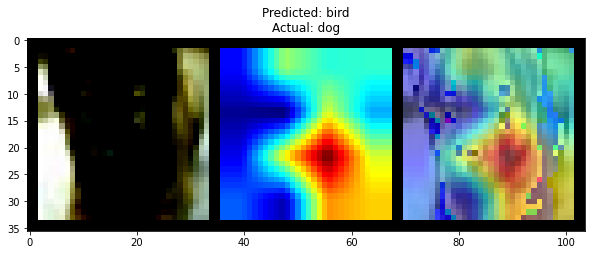

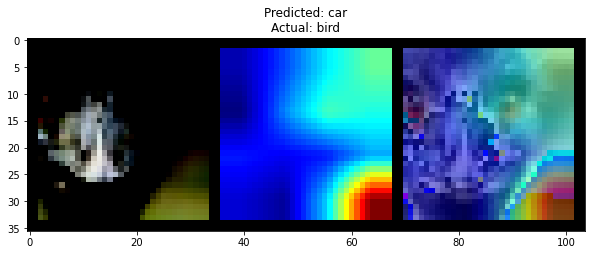

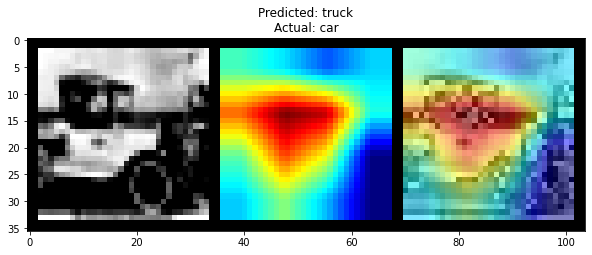

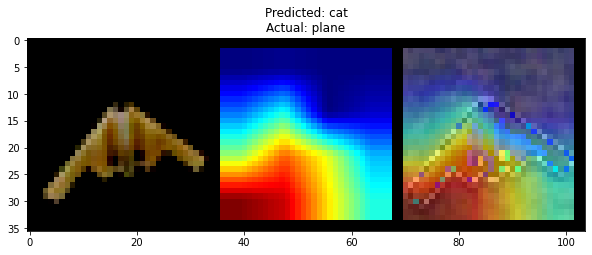

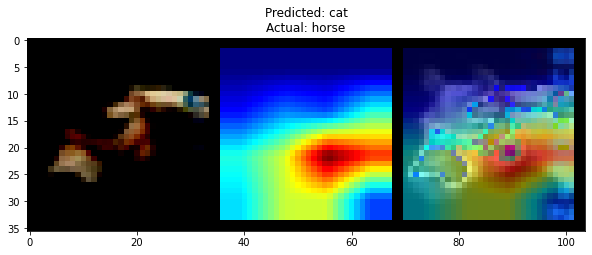

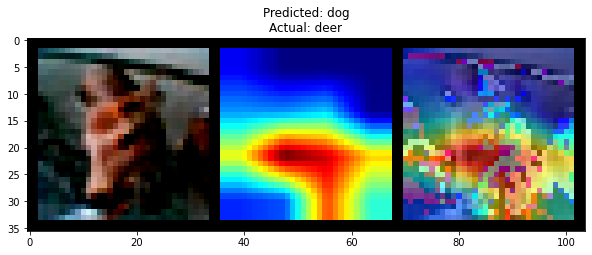

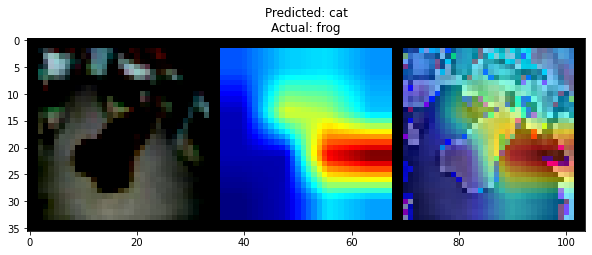

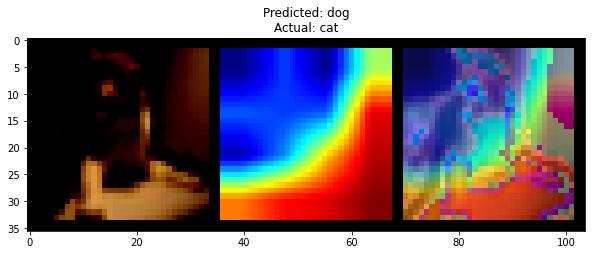

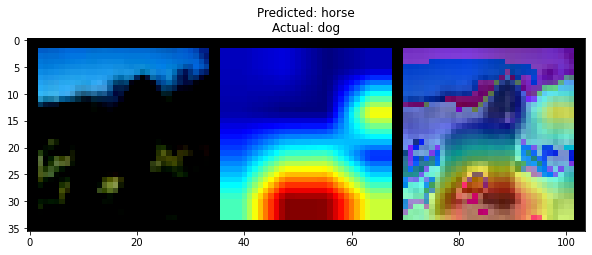

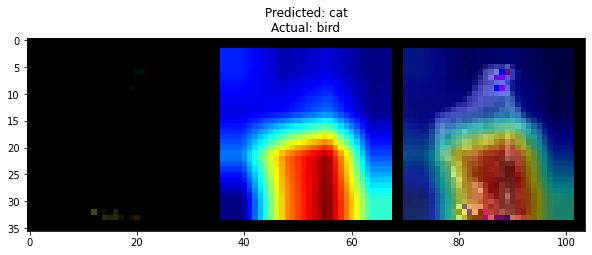

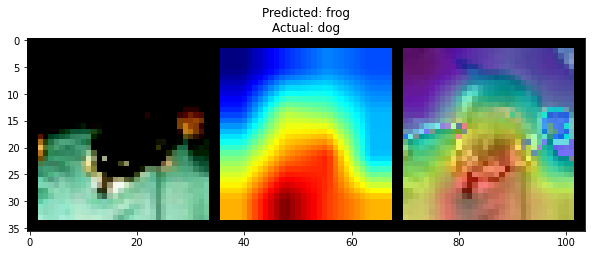

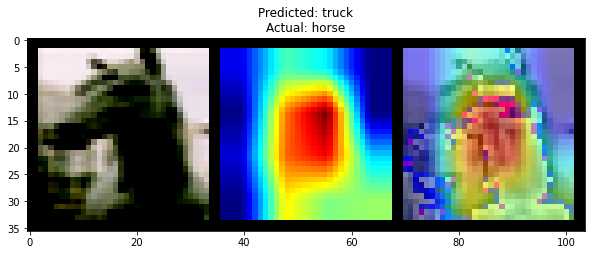

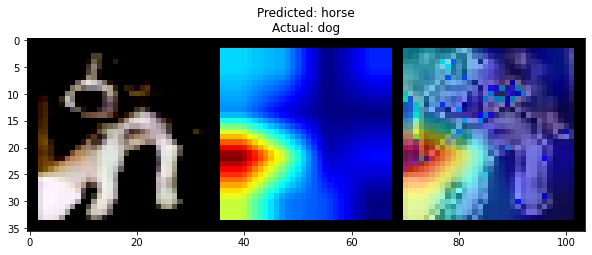

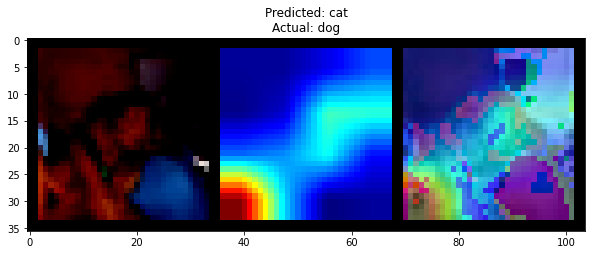

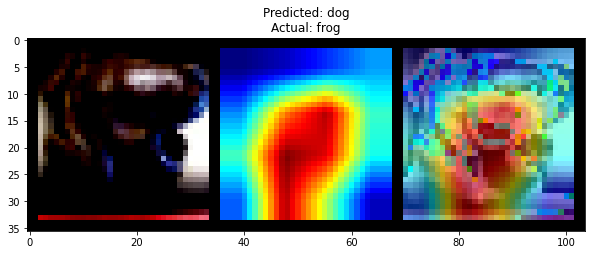

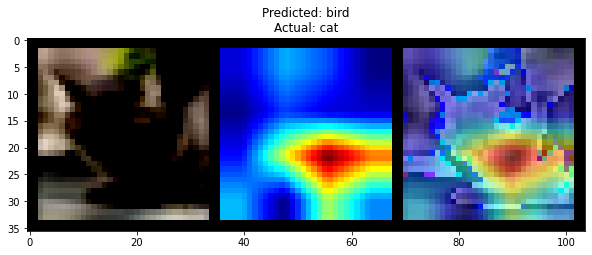

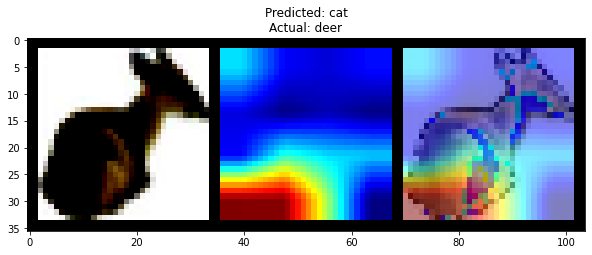

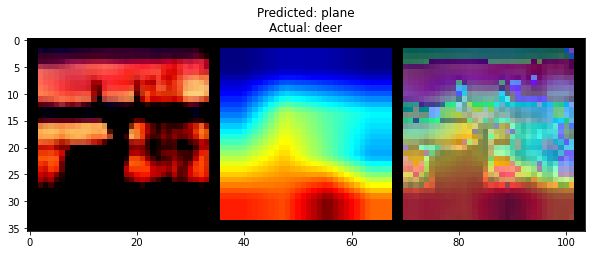

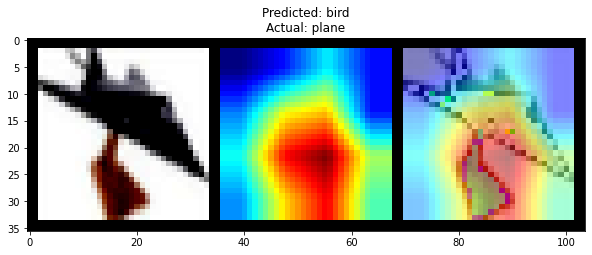

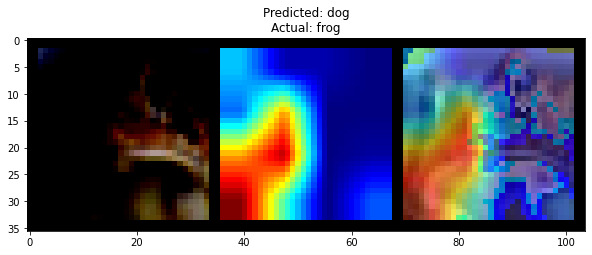

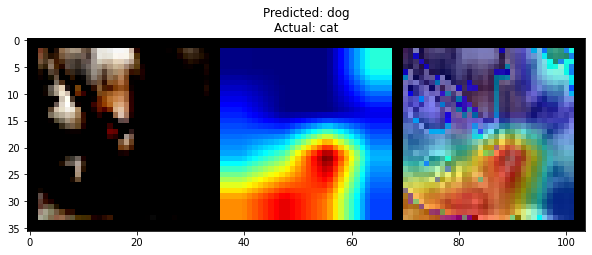

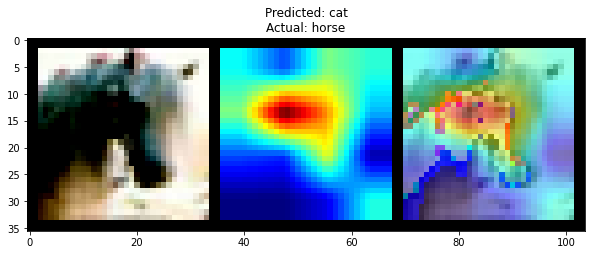

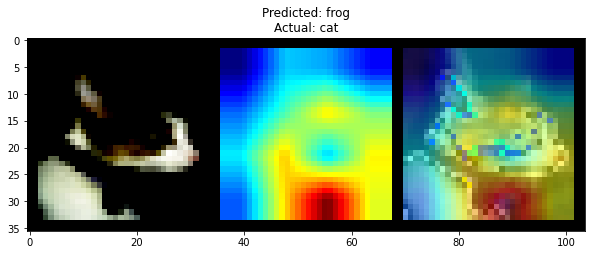

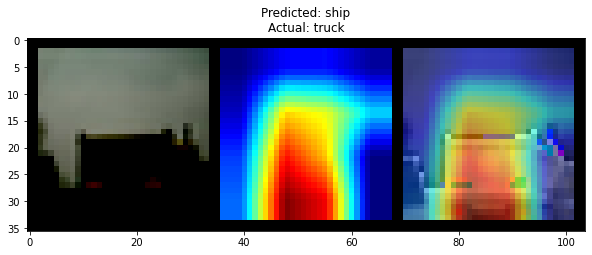

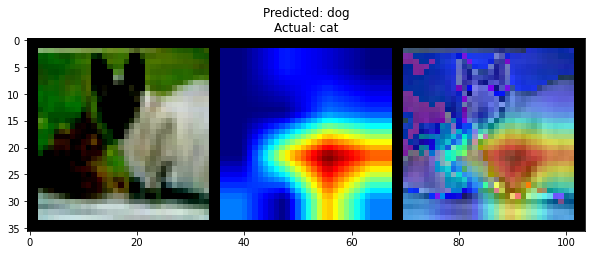

In [17]:
MC.gradcam_misclassified(new_model.misclassified_images,model,device)




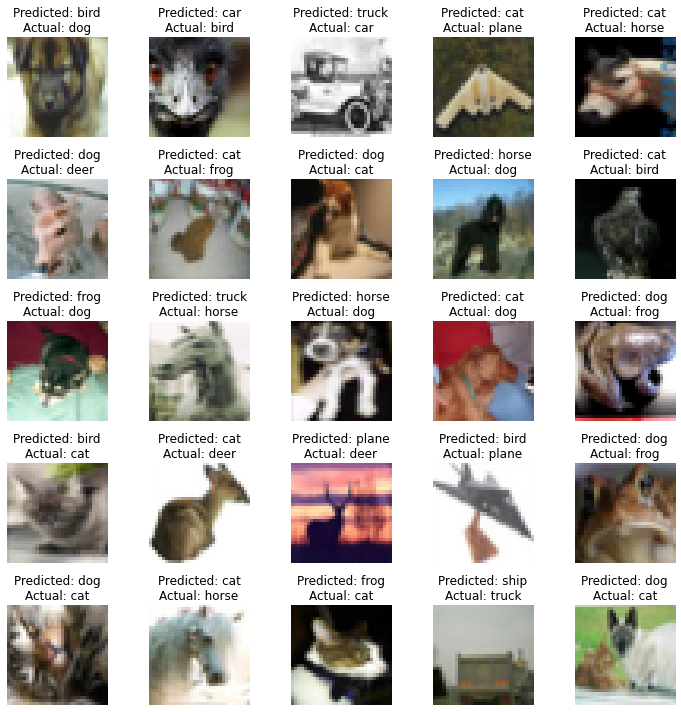

In [18]:
new_model.plot_misclassified('mis.jpg')

In [19]:
new_model.total_accuracy()

Accuracy of the network on the 10000 test images: 89 %


In [20]:
new_model.classwise_acc()


Accuracy of plane : 89 %
Accuracy of   car : 96 %
Accuracy of  bird : 81 %
Accuracy of   cat : 76 %
Accuracy of  deer : 85 %
Accuracy of   dog : 81 %
Accuracy of  frog : 91 %
Accuracy of horse : 88 %
Accuracy of  ship : 93 %
Accuracy of truck : 89 %



Length of train acc is 50
Length of test acc is 50


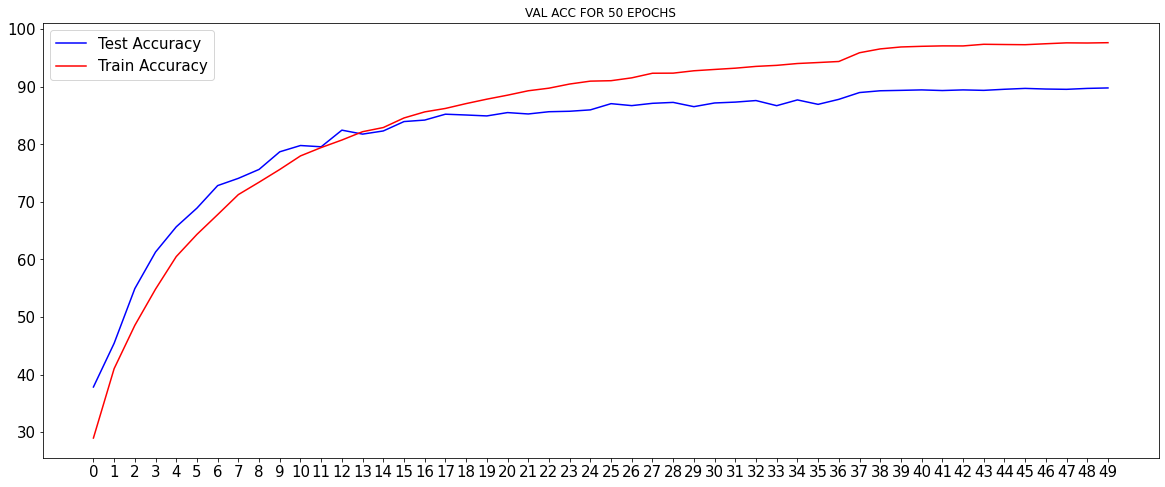

In [21]:
new_model.plot_train_test_acc()